# **word n grame**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB

import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
import itertools


In [3]:

# Define the function to compute metrics
def compute_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='macro')
    return accuracy, precision, recall, f1

# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


In [4]:
# Load your data into a DataFrame
df = pd.read_excel('/content/drive/MyDrive/seema/Copy of val.xlsx')

# Ensure your label column is named 'class' and the tweet text is under 'Tweet'
labels = df['class'].values  # Make sure to correct the space in column name if necessary
tweets = df['Tweet'].values


Fold 1
Accuracy: 0.7640378548895899
Precision: 0.7688837976475675
Recall: 0.7494742427477854
F1 Score: 0.7531415845179518
Confusion Matrix:
[[439 254]
 [120 772]]


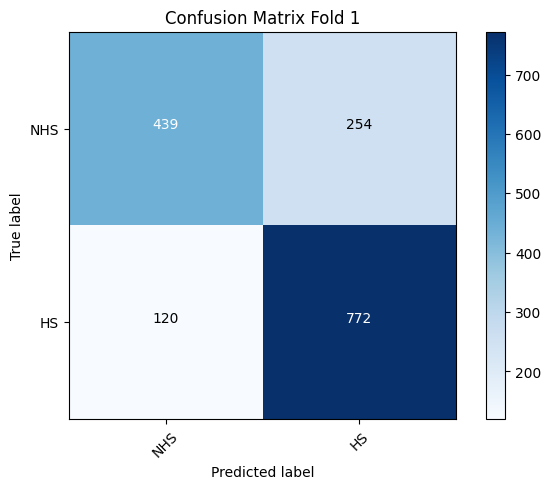


Fold 2
Accuracy: 0.7652996845425868
Precision: 0.7741369962690561
Recall: 0.7486637677220637
F1 Score: 0.7526081002154956
Confusion Matrix:
[[427 266]
 [106 786]]


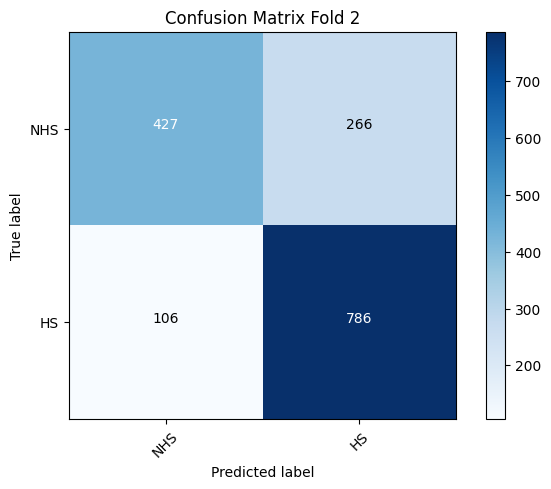


Fold 3
Accuracy: 0.7525252525252525
Precision: 0.7598784682862565
Recall: 0.7357704024370691
F1 Score: 0.7392036262039605
Confusion Matrix:
[[417 276]
 [116 775]]


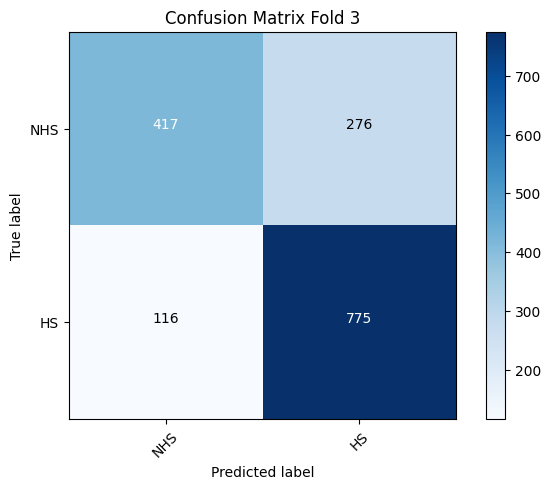


Fold 4
Accuracy: 0.7670454545454546
Precision: 0.7763050687555391
Recall: 0.7504409171075838
F1 Score: 0.7544315018853656
Confusion Matrix:
[[428 265]
 [104 787]]


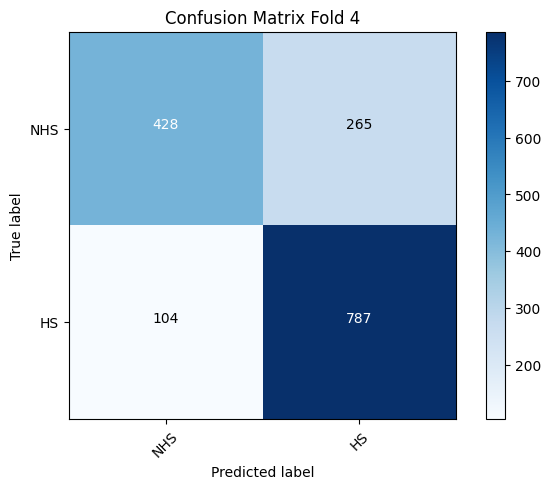


Fold 5
Accuracy: 0.7632575757575758
Precision: 0.7653404531143898
Recall: 0.7506012506012506
F1 Score: 0.7538920481029179
Confusion Matrix:
[[450 243]
 [132 759]]


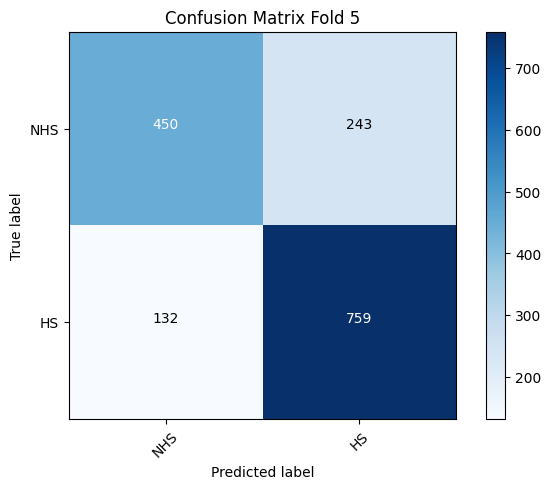


Mean Metrics Across All Folds:
Mean Accuracy: 0.7624331644520919
Mean Precision: 0.7689089568145617
Mean Recall: 0.7469901161231505
Mean F1 Score: 0.7506553721851382

Aggregated Confusion Matrix:
[[2161 1304]
 [ 578 3879]]


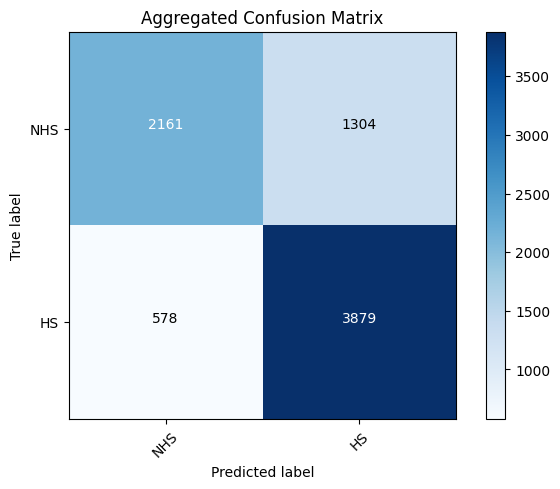

In [5]:
# Stratified K-Fold setup
skf = StratifiedKFold(n_splits=5)

# Initialize lists to store metrics for each fold
fold_accuracies = []
fold_precisions = []
fold_recalls = []
fold_f1_scores = []
aggregate_cm = np.array([[0, 0], [0, 0]])

# Vectorize the text data
tfidf_vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1, 2))
X_tfidf = tfidf_vectorizer.fit_transform(tweets)

# Loop through the folds
for fold, (train_idx, val_idx) in enumerate(skf.split(X_tfidf, labels)):
    print(f'\nFold {fold + 1}')

    # Split the data
    X_train_tfidf, X_val_tfidf = X_tfidf[train_idx], X_tfidf[val_idx]
    y_train, y_val = labels[train_idx], labels[val_idx]


    # Initialize and train the MultinomialNB model
    nb_model = MultinomialNB()
    nb_model.fit(X_train_tfidf, y_train)

    # Predict on the validation set
    y_pred = nb_model.predict(X_val_tfidf)


    # Compute metrics
    accuracy, precision, recall, f1 = compute_metrics(y_val, y_pred)
    fold_accuracies.append(accuracy)
    fold_precisions.append(precision)
    fold_recalls.append(recall)
    fold_f1_scores.append(f1)

    # Output metrics
    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1 Score: {f1}')

    # Compute and output confusion matrix
    cm = confusion_matrix(y_val, y_pred)
    aggregate_cm += cm
    print(f'Confusion Matrix:\n{cm}')
    plot_confusion_matrix(cm, classes=['NHS', 'HS'], title=f'Confusion Matrix Fold {fold + 1}')

# Calculate and print mean of the metrics across all folds
mean_accuracy = np.mean(fold_accuracies)
mean_precision = np.mean(fold_precisions)
mean_recall = np.mean(fold_recalls)
mean_f1_score = np.mean(fold_f1_scores)

print('\nMean Metrics Across All Folds:')
print(f'Mean Accuracy: {mean_accuracy}')
print(f'Mean Precision: {mean_precision}')
print(f'Mean Recall: {mean_recall}')
print(f'Mean F1 Score: {mean_f1_score}')

# Plot the aggregated confusion matrix
print('\nAggregated Confusion Matrix:')
print(aggregate_cm)
plot_confusion_matrix(aggregate_cm, classes=['NHS', 'HS'], title='Aggregated Confusion Matrix')


# **char ngrame **


Fold 1
Accuracy: 0.7589905362776025
Precision: 0.7564525040777907
Recall: 0.7507845915917665
F1 Score: 0.7526893051920256
Confusion Matrix:
[[475 218]
 [164 728]]


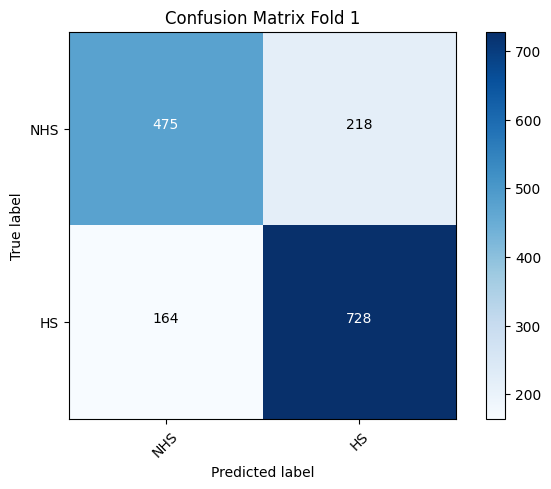


Fold 2
Accuracy: 0.7608832807570978
Precision: 0.7595144576299515
Recall: 0.7511785051022719
F1 Score: 0.7536277176866437
Confusion Matrix:
[[467 226]
 [153 739]]


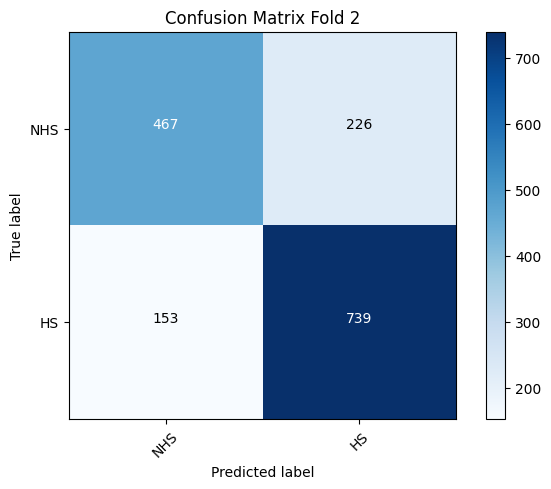


Fold 3
Accuracy: 0.7670454545454546
Precision: 0.7643370120243782
Recall: 0.7599005932339266
F1 Score: 0.7615251073552363
Confusion Matrix:
[[487 206]
 [163 728]]


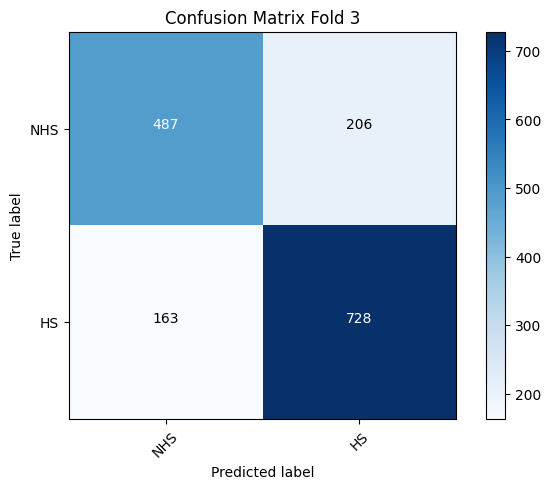


Fold 4
Accuracy: 0.7335858585858586
Precision: 0.7293582691602494
Recall: 0.7279140612473947
F1 Score: 0.7285380116959066
Confusion Matrix:
[[473 220]
 [202 689]]


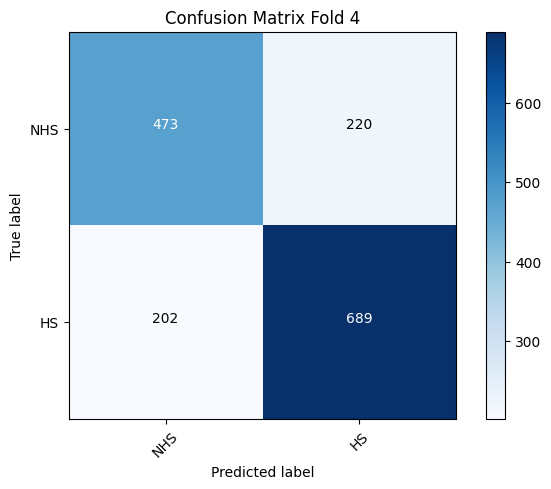


Fold 5
Accuracy: 0.7803030303030303
Precision: 0.7770250368188513
Recall: 0.775693442360109
F1 Score: 0.7762958826546845
Confusion Matrix:
[[512 181]
 [167 724]]


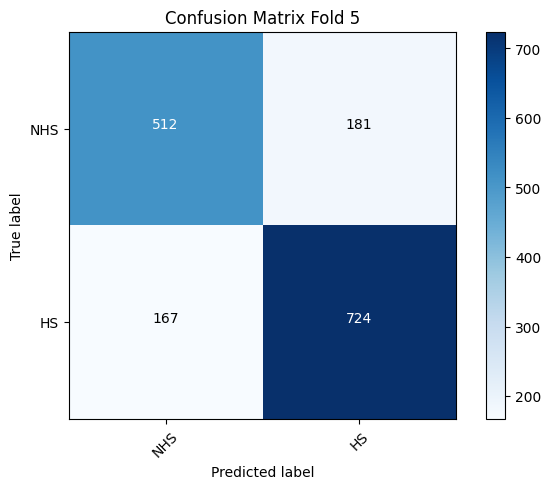


Mean Metrics Across All Folds:
Mean Accuracy: 0.7601616320938087
Mean Precision: 0.7573374559422442
Mean Recall: 0.7530942387070937
Mean F1 Score: 0.7545352049168994

Aggregated Confusion Matrix:
[[2414 1051]
 [ 849 3608]]


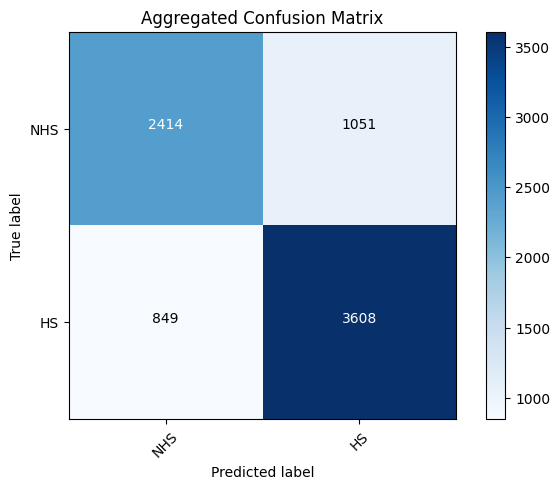

In [6]:
# Ensure your label column is named 'class' and the tweet text is under 'Tweet'
labels = df['class'].values  # Make sure to correct the space in column name if necessary
tweets = df['Tweet'].values

# Stratified K-Fold setup
skf = StratifiedKFold(n_splits=5)

# Initialize lists to store metrics for each fold
fold_accuracies = []
fold_precisions = []
fold_recalls = []
fold_f1_scores = []
aggregate_cm = np.array([[0, 0], [0, 0]])

# Vectorize the text data using Character N-grams
tfidf_vectorizer = TfidfVectorizer(analyzer='char', max_features=10000, ngram_range=(2, 6))
X_tfidf = tfidf_vectorizer.fit_transform(tweets)


# Loop through the folds
for fold, (train_idx, val_idx) in enumerate(skf.split(X_tfidf, labels)):
    print(f'\nFold {fold + 1}')

    # Split the data
    X_train_tfidf, X_val_tfidf = X_tfidf[train_idx], X_tfidf[val_idx]
    y_train, y_val = labels[train_idx], labels[val_idx]

    # Initialize and train the MultinomialNB model
    nb_model = MultinomialNB()
    nb_model.fit(X_train_tfidf, y_train)

    # Predict on the validation set
    y_pred = nb_model.predict(X_val_tfidf)

    # Compute metrics
    accuracy, precision, recall, f1 = compute_metrics(y_val, y_pred)
    fold_accuracies.append(accuracy)
    fold_precisions.append(precision)
    fold_recalls.append(recall)
    fold_f1_scores.append(f1)

    # Output metrics
    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1 Score: {f1}')

    # Compute and output confusion matrix
    cm = confusion_matrix(y_val, y_pred)
    aggregate_cm += cm
    print(f'Confusion Matrix:\n{cm}')
    plot_confusion_matrix(cm, classes=['NHS', 'HS'], title=f'Confusion Matrix Fold {fold + 1}')

# Calculate and print mean of the metrics across all folds
mean_accuracy = np.mean(fold_accuracies)
mean_precision = np.mean(fold_precisions)
mean_recall = np.mean(fold_recalls)
mean_f1_score = np.mean(fold_f1_scores)

print('\nMean Metrics Across All Folds:')
print(f'Mean Accuracy: {mean_accuracy}')
print(f'Mean Precision: {mean_precision}')
print(f'Mean Recall: {mean_recall}')
print(f'Mean F1 Score: {mean_f1_score}')

# Plot the aggregated confusion matrix
print('\nAggregated Confusion Matrix:')
print(aggregate_cm)
plot_confusion_matrix(aggregate_cm, classes=['NHS', 'HS'], title='Aggregated Confusion Matrix')


**word/char n grame**


Fold 1
Accuracy: 0.7810725552050474
Precision: 0.7777583685407865
Recall: 0.7765200046590182
F1 Score: 0.7770845720450974
Confusion Matrix:
[[513 180]
 [167 725]]


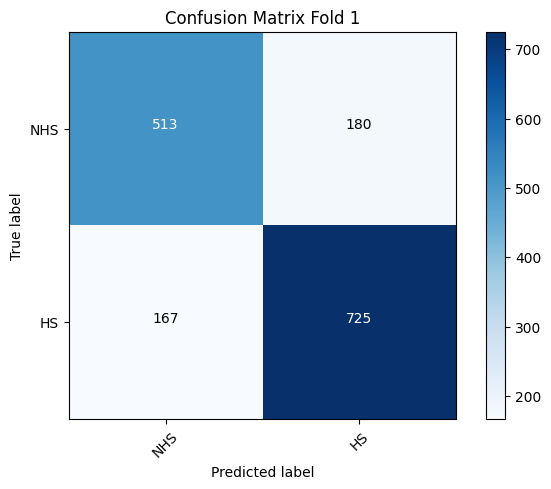


Fold 2
Accuracy: 0.7634069400630915
Precision: 0.7608010838212289
Recall: 0.7556741340373627
F1 Score: 0.7574693324943964
Confusion Matrix:
[[481 212]
 [163 729]]


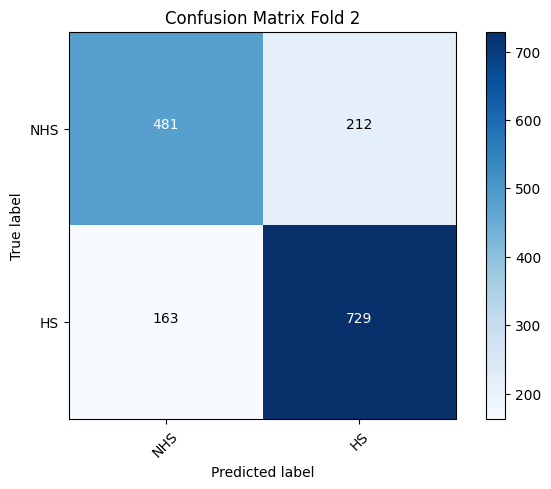


Fold 3
Accuracy: 0.7695707070707071
Precision: 0.7661672155737438
Recall: 0.7643899310565977
F1 Score: 0.7651633835871886
Confusion Matrix:
[[501 192]
 [173 718]]


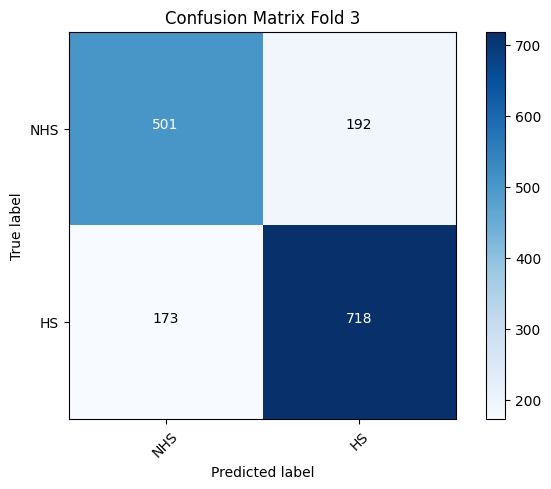


Fold 4
Accuracy: 0.7525252525252525
Precision: 0.7486017303030057
Recall: 0.7482764149430816
F1 Score: 0.7484341145069466
Confusion Matrix:
[[495 198]
 [194 697]]


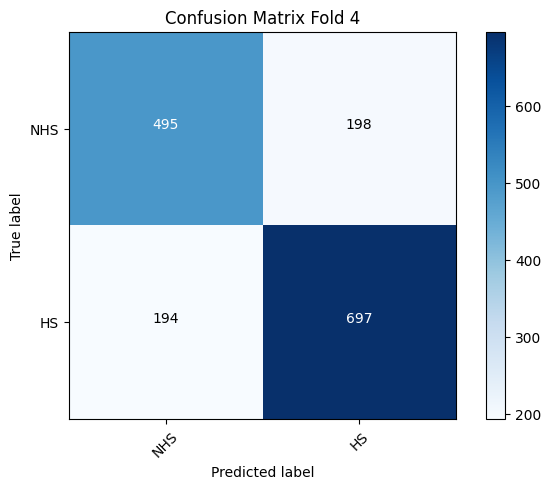


Fold 5
Accuracy: 0.7803030303030303
Precision: 0.7768062986645787
Recall: 0.7782587782587782
F1 Score: 0.7774289202860631
Confusion Matrix:
[[528 165]
 [183 708]]


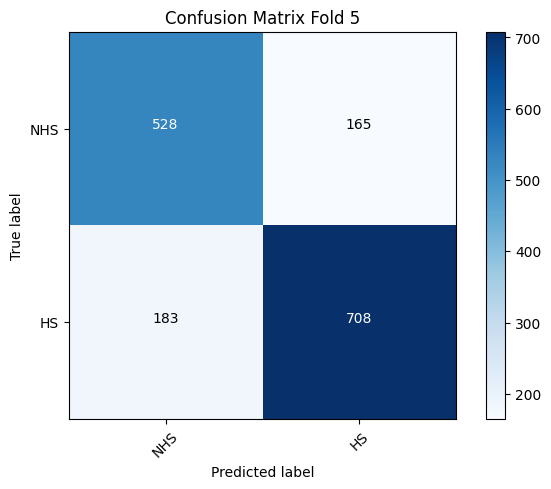


Mean Metrics Across All Folds:
Mean Accuracy: 0.7693756970334258
Mean Precision: 0.7660269393806688
Mean Recall: 0.7646238525909677
Mean F1 Score: 0.7651160645839384

Aggregated Confusion Matrix:
[[2518  947]
 [ 880 3577]]


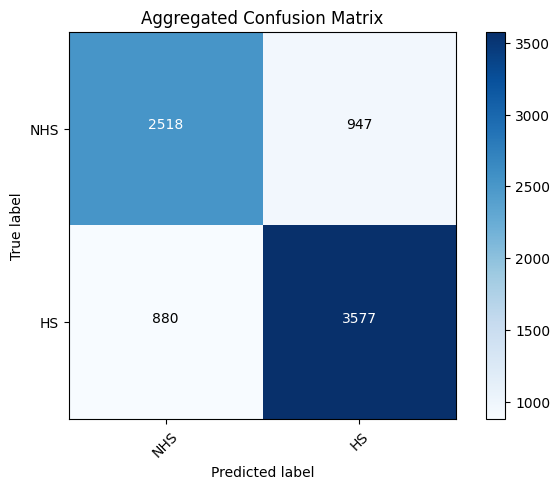

In [7]:
from scipy.sparse import hstack

# Ensure your label column is named 'class' and the tweet text is under 'Tweet'
labels = df['class'].values  # Corrected column name space
tweets = df['Tweet'].values

# Initialize TfidfVectorizer for Word N-grams and Character N-grams
word_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
char_vectorizer = TfidfVectorizer(analyzer='char', max_features=5000, ngram_range=(2, 6))

# Fit and transform the tweets using both vectorizers
X_word = word_vectorizer.fit_transform(tweets)
X_char = char_vectorizer.fit_transform(tweets)

# Combine the Word and Character N-grams features
X_combined = hstack([X_word, X_char])

# Stratified K-Fold setup
skf = StratifiedKFold(n_splits=5)

# Initialize lists to store metrics for each fold
fold_accuracies = []
fold_precisions = []
fold_recalls = []
fold_f1_scores = []
aggregate_cm = np.array([[0, 0], [0, 0]])

# Loop through the folds
for fold, (train_idx, val_idx) in enumerate(skf.split(X_combined, labels)):
    print(f'\nFold {fold + 1}')

    # Split the combined features for training and validation
    X_train, X_val = X_combined[train_idx], X_combined[val_idx]
    y_train, y_val = labels[train_idx], labels[val_idx]

    # Initialize and train the MultinomialNB model
    nb_model = MultinomialNB()
    nb_model.fit(X_train, y_train)

    # Predict on the validation set
    y_pred = nb_model.predict(X_val)


    # Compute metrics
    accuracy, precision, recall, f1 = compute_metrics(y_val, y_pred)
    fold_accuracies.append(accuracy)
    fold_precisions.append(precision)
    fold_recalls.append(recall)
    fold_f1_scores.append(f1)

    # Output metrics
    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1 Score: {f1}')

    # Compute and output confusion matrix
    cm = confusion_matrix(y_val, y_pred)
    aggregate_cm += cm
    print(f'Confusion Matrix:\n{cm}')
    plot_confusion_matrix(cm, classes=['NHS', 'HS'], title=f'Confusion Matrix Fold {fold + 1}')

# Calculate and print mean of the metrics across all folds
mean_accuracy = np.mean(fold_accuracies)
mean_precision = np.mean(fold_precisions)
mean_recall = np.mean(fold_recalls)
mean_f1_score = np.mean(fold_f1_scores)

print('\nMean Metrics Across All Folds:')
print(f'Mean Accuracy: {mean_accuracy}')
print(f'Mean Precision: {mean_precision}')
print(f'Mean Recall: {mean_recall}')
print(f'Mean F1 Score: {mean_f1_score}')

# Plot the aggregated confusion matrix
print('\nAggregated Confusion Matrix:')
print(aggregate_cm)
plot_confusion_matrix(aggregate_cm, classes=['NHS', 'HS'], title='Aggregated Confusion Matrix')
